<a href="https://colab.research.google.com/github/anrizki/ManajemenData/blob/main/lampiran_paper_pms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [290]:
import pandas as pd
import numpy as np
#import dataset
df = pd.read_csv("/content/diabetes (2).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [178]:
# mengecek missing value
df.isna().sum().any()

False

In [268]:
data = df.copy(deep = True)

feature_cols = data.drop('Outcome', axis=1).columns.to_list()

for col in feature_cols:
    if col == 'Pregnancies':
        continue
    data.loc[data[data[col] == 0].index, col] = np.nan

# Showing the Count of NANs
print(data.isna().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [180]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.0,42.0,130.0,32.7,0.719,36,1
1997,6,85.0,78.0,NaN,NaN,31.2,0.382,42,0
1998,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


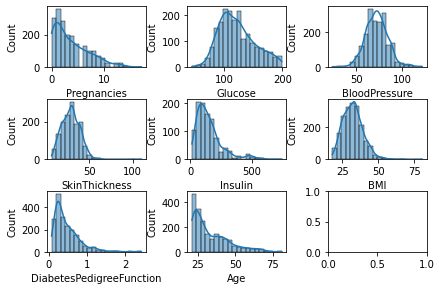

In [266]:
fig, axes = plt.subplots(nrows=3, ncols=3)
plt.tight_layout()

for col, ax in zip(feature_cols, axes.flatten()):
    sns.histplot(data, x=col, ax=ax, bins=20, kde=True)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   1987 non-null   float64
 2   BloodPressure             1910 non-null   float64
 3   SkinThickness             1427 non-null   float64
 4   Insulin                   1044 non-null   float64
 5   BMI                       1972 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


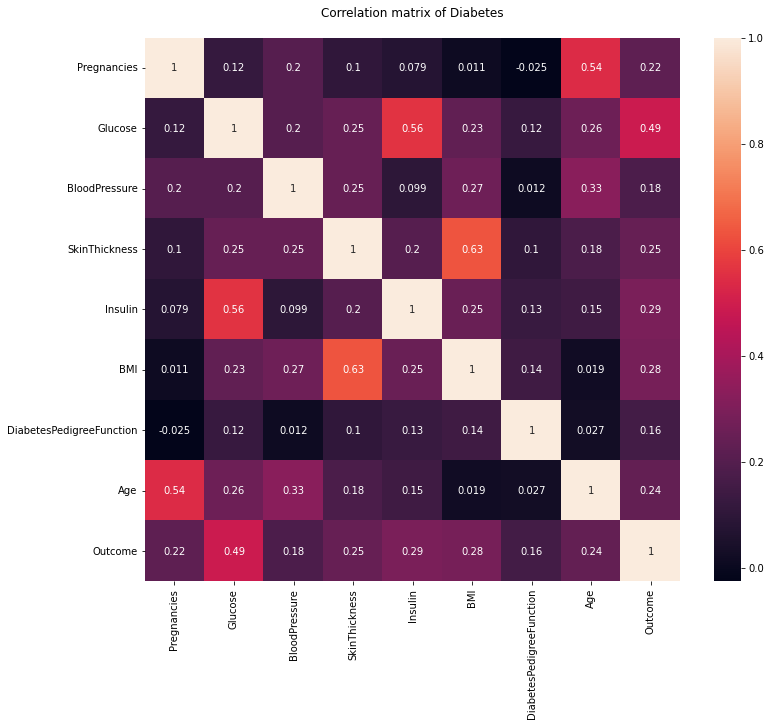

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
hm = sns.heatmap(data.corr(), annot = True)
hm.set(title = "Correlation matrix of Diabetes\n")
plt.show()

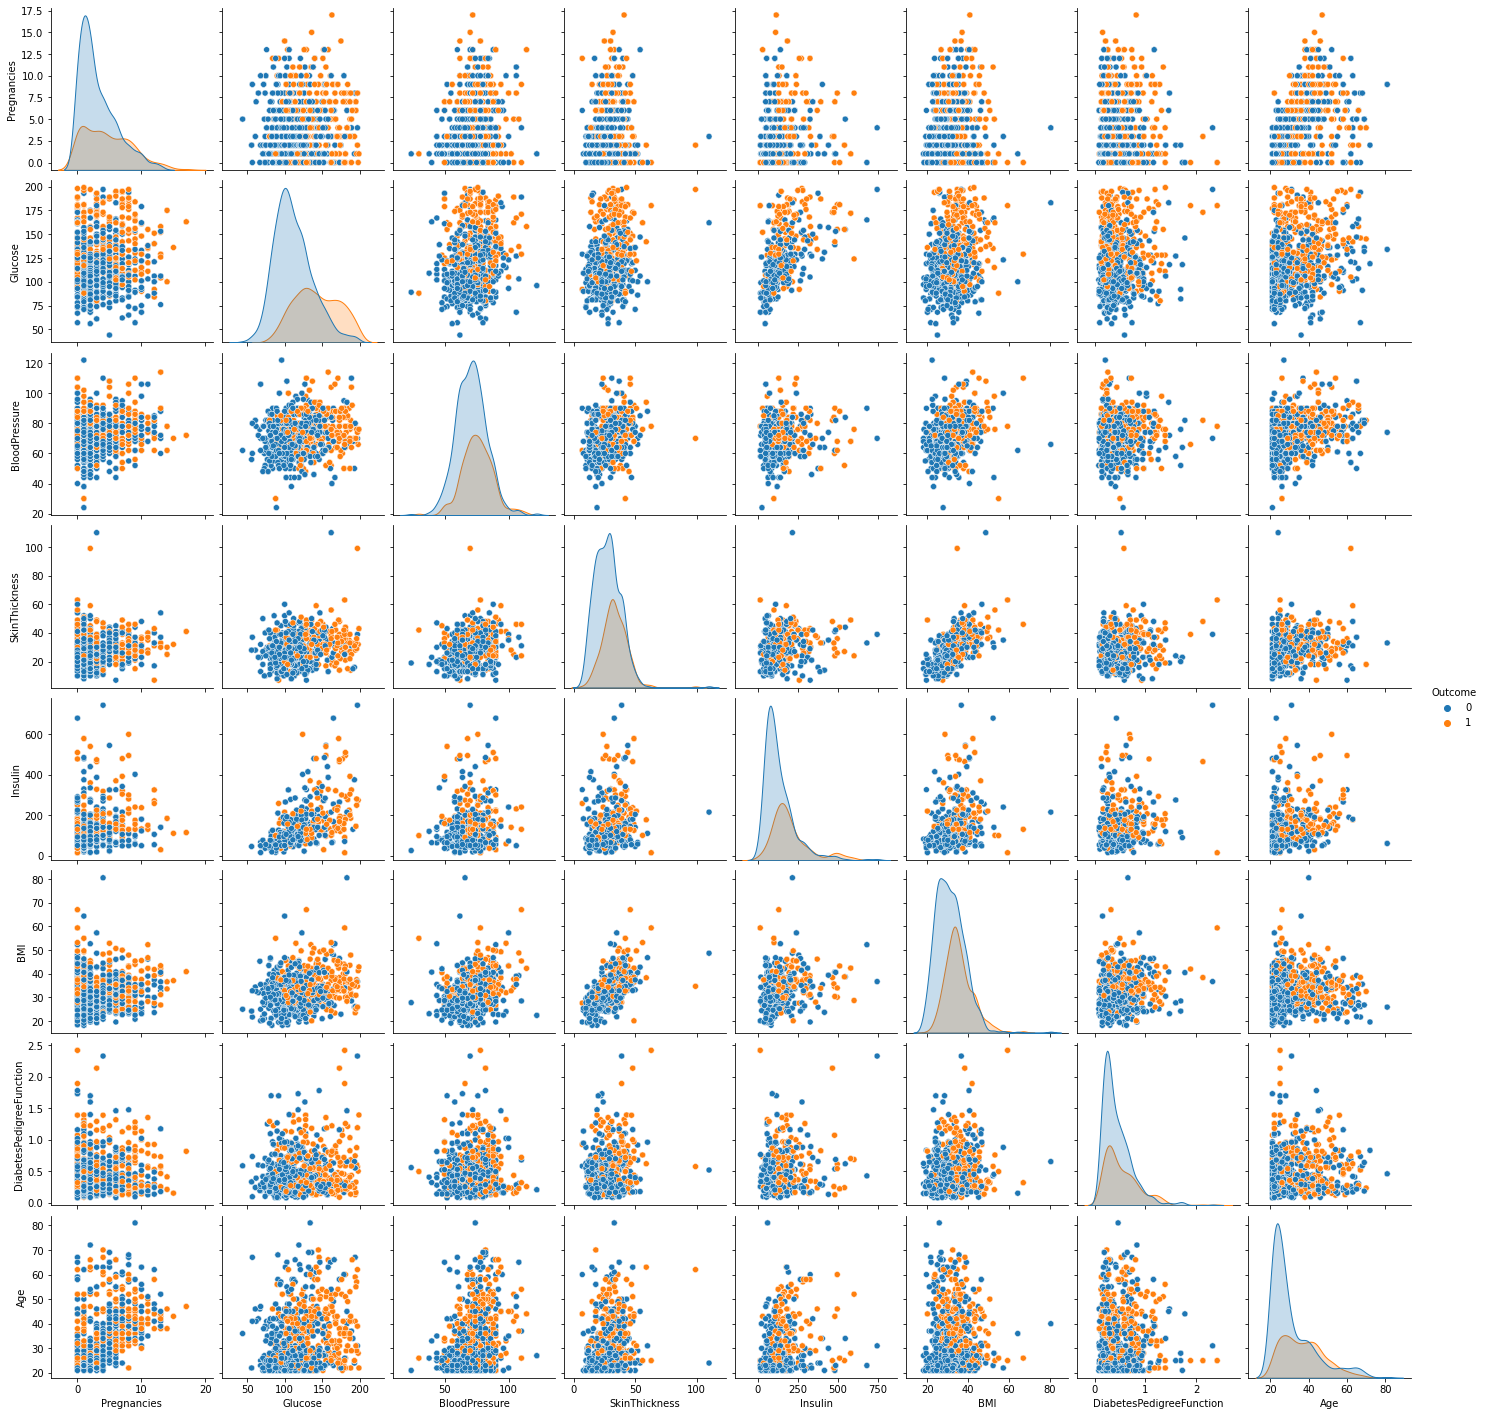

In [184]:
sns.pairplot(data, hue = 'Outcome')

# Splitting Data

In [185]:
# splitting data
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [186]:
# class count
class_count_0, class_count_1 = y_train.value_counts()

# Separate class
class_0 = y_train[y_train == 0]
class_1 = y_train[y_train == 1]

# print the shape of the class
print('Class 0:', class_0.shape)
print('Class 1:', class_1.shape)

Class 0: (1060,)
Class 1: (540,)


In [187]:
print("Number X_train dataset: ", X_train.shape)
print("Number y_train dataset: ", y_train.shape)
print("Number X_test dataset: ", X_test.shape)
print("Number y_test dataset: ", y_test.shape)

Number X_train dataset:  (1600, 8)
Number y_train dataset:  (1600,)
Number X_test dataset:  (400, 8)
Number y_test dataset:  (400,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

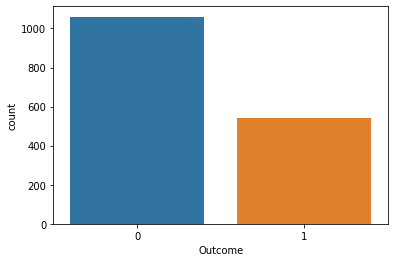

In [188]:
g = sns.countplot(y_train)
g.set_xticklabels(['0','1'])
plt.show

# Handling Missing Value

In [189]:
X_train.isna().sum()

Pregnancies                   0
Glucose                       9
BloodPressure                68
SkinThickness               445
Insulin                     749
BMI                          23
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [190]:
#1. Function to replace NAN values with mode value
def impute_nan_mean_numeric(DataFrame,ColName):
  # .mode()[0] - gives first category name
  mean_numeric=DataFrame[ColName].mean()
  
  # replace nan values with most occured category
  DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
  DataFrame[ColName + "_Imputed"].fillna(mean_numeric,inplace=True)

#2. Call function to impute most occured category
for Columns in ['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI']:
    impute_nan_mean_numeric(X_train,Columns)
    
# Display imputed result
X_train[['Glucose','Glucose_Imputed','BloodPressure','BloodPressure_Imputed',
        'SkinThickness','SkinThickness_Imputed','Insulin','Insulin_Imputed',
        'BMI','BMI_Imputed']].head(10)

#3. Drop smoking_status
X_train = X_train.drop(['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI'], axis = 1)

In [191]:
X_train.isna().sum().any()

False

In [192]:
X_test.isna().sum()

Pregnancies                   0
Glucose                       4
BloodPressure                22
SkinThickness               128
Insulin                     207
BMI                           5
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [193]:
#1. Function to replace NAN values with mode value
def impute_nan_mean_numeric(DataFrame,ColName):
  # .mode()[0] - gives first category name
  mean_numeric=DataFrame[ColName].mean()
  
  # replace nan values with most occured category
  DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
  DataFrame[ColName + "_Imputed"].fillna(mean_numeric,inplace=True)

#2. Call function to impute most occured category
for Columns in ['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI']:
    impute_nan_mean_numeric(X_test,Columns)
    
# Display imputed result
X_test[['Glucose','Glucose_Imputed','BloodPressure','BloodPressure_Imputed',
        'SkinThickness','SkinThickness_Imputed','Insulin','Insulin_Imputed',
        'BMI','BMI_Imputed']].head(10)

#3. Drop smoking_status
X_test = X_test.drop(['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI'], axis = 1)

In [194]:
X_test.isna().sum().any()

False

# Handling Imbalanced Data

## SMOTE

In [195]:
print("Before SMOTE, counts of label '1': {}".format(sum(y_train == 1)))
print("Before SMOTE, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

print('After SMOTE, the shape of train_X: {}'.format(X_train_sm.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_sm == 0)))


Before SMOTE, counts of label '1': 540
Before SMOTE, counts of label '0': 1060 

After SMOTE, the shape of train_X: (2120, 8)
After SMOTE, the shape of train_y: (2120,) 

After SMOTE, counts of label '1': 1060
After SMOTE, counts of label '0': 1060


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

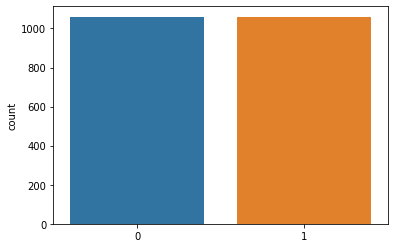

In [196]:
g = sns.countplot(y_train_sm)
g.set_xticklabels(['0','1'])
plt.show

## ADASYN

In [197]:
print("Before ADASYN, counts of label '1': {}".format(sum(y_train == 1)))
print("Before ADASYN, counts of label '0': {} \n".format(sum(y_train == 0)))

# import ADASYN module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state = 2)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train.ravel())

print('After ADASYN, the shape of train_X: {}'.format(X_train_ada.shape))
print('After ADASYN, the shape of train_y: {} \n'.format(y_train_ada.shape))

print("After ADASYN, counts of label '1': {}".format(sum(y_train_ada == 1)))
print("After ADASYN, counts of label '0': {}".format(sum(y_train_ada == 0)))

Before ADASYN, counts of label '1': 540
Before ADASYN, counts of label '0': 1060 

After ADASYN, the shape of train_X: (2128, 8)
After ADASYN, the shape of train_y: (2128,) 

After ADASYN, counts of label '1': 1068
After ADASYN, counts of label '0': 1060


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

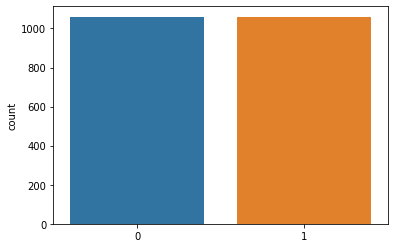

In [198]:
g = sns.countplot(y_train_sm)
g.set_xticklabels(['0','1'])
plt.show

#Random Forest

## Sebelum Handling

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay

In [269]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000]}


In [276]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train.ravel())
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1557}

In [277]:
# Random Forest object
rf = RandomForestClassifier(n_estimators=1557, max_depth=60,
                            min_samples_leaf=2, max_features='sqrt',
                            random_state=42)

# train the model on train set
rf.fit(X_train, y_train.ravel())

predictions_rf = rf.predict(X_test)

# print classification report
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       256
           1       0.94      0.90      0.92       144

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



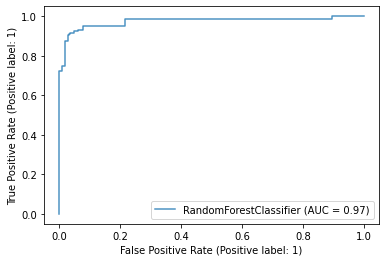

In [278]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [279]:
confusion_matrix(y_test, predictions_rf)

array([[248,   8],
       [ 14, 130]])

## Random Forest SMOTE

In [280]:
rf_random.fit(X_train_sm, y_train_sm.ravel())
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 894}

In [274]:
# Random Forest object
rf2 = RandomForestClassifier(n_estimators=894, max_depth=50,
                             min_samples_split=10, random_state=42)

# train the model on train set
rf2.fit(X_train_sm, y_train_sm.ravel())

predictions_rf2 = rf2.predict(X_test)

# print classification report
print(classification_report(y_test, predictions_rf2))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       256
           1       0.89      0.92      0.91       144

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



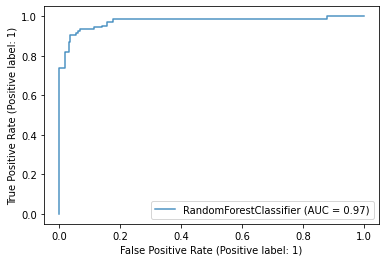

In [281]:
ax = plt.gca()
rf2c_disp = RocCurveDisplay.from_estimator(rf2, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

##Random Forest ADASYN

In [283]:
rf_random.fit(X_train_ada, y_train_ada.ravel())
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 673}

In [284]:
rf3 = RandomForestClassifier(n_estimators=673, max_depth=70,
                             max_features='sqrt')
rf3.fit(X_train_ada, y_train_ada.ravel())
predictions_rf3 = rf3.predict(X_test)

# print classification report
print(classification_report(y_test, predictions_rf3))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       256
           1       0.93      0.95      0.94       144

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.95      0.96       400



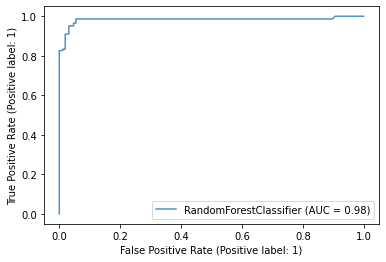

In [285]:
ax = plt.gca()
rf3c_disp = RocCurveDisplay.from_estimator(rf3, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## Komparasi Model Random Forest

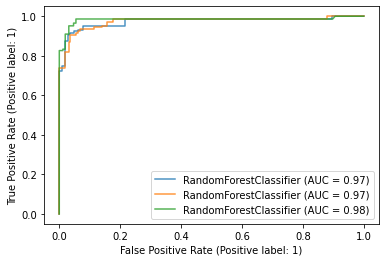

In [286]:
ax=plt.gca()
rfc_disp.plot(ax=ax,alpha=0.8)
rf2c_disp.plot(ax=ax,alpha=0.8)
rf3c_disp.plot(ax=ax,alpha=0.8)
plt.show()


# Extra Trees

## Sebelum Handling

In [230]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay

In [288]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000]}


In [289]:
# Use the random grid to search for best hyperparameters
et = ExtraTreesClassifier()
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
et_random.fit(X_train, y_train.ravel())
et_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 452}

In [251]:
# Extra Trees object
et = ExtraTreesClassifier(n_estimators=894, 
                          max_depth=70, 
                          min_samples_split=5,
                          bootstrap=False,
                          max_features='log2')

# train the model on train set
et.fit(X_train, y_train.ravel())

predictions_et = et.predict(X_test)

# print classification report
print(classification_report(y_test, predictions_et))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       256
           1       0.95      0.94      0.94       144

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



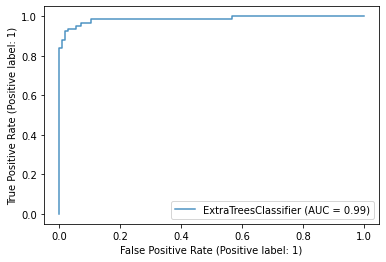

In [252]:
ax = plt.gca()
etc_disp = RocCurveDisplay.from_estimator(et, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [261]:
confusion_matrix(y_test, predictions_et)

array([[249,   7],
       [  9, 135]])

## Extra Trees SMOTE

In [235]:
et_random.fit(X_train_sm, y_train_sm.ravel())
et_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 673}

In [246]:
# Extra Trees object
et2 = ExtraTreesClassifier(n_estimators=673, max_depth=20, max_features='log2',
                           bootstrap=False)

# train the model on train set
et2.fit(X_train_sm, y_train_sm.ravel())

predictions_et2 = et2.predict(X_test)

# print classification report
print(classification_report(y_test, predictions_et2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       256
           1       0.92      0.94      0.93       144

    accuracy                           0.95       400
   macro avg       0.94      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



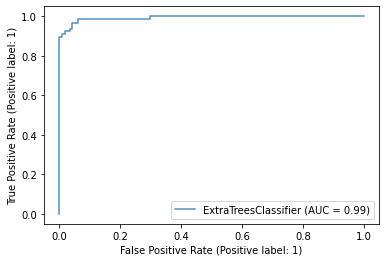

In [247]:
ax = plt.gca()
et2c_disp = RocCurveDisplay.from_estimator(et2, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

##Extra Trees ADASYN

In [238]:
et_random.fit(X_train_ada, y_train_ada.ravel())
et_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1336}

In [248]:
et3 = ExtraTreesClassifier(max_depth=None,
                             max_features='log2',
                             n_estimators=1336)
et3.fit(X_train_ada, y_train_ada.ravel())
predictions_et3 = et3.predict(X_test)

# print classification report
print(classification_report(y_test, predictions_et3))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       256
           1       0.92      0.94      0.93       144

    accuracy                           0.95       400
   macro avg       0.94      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



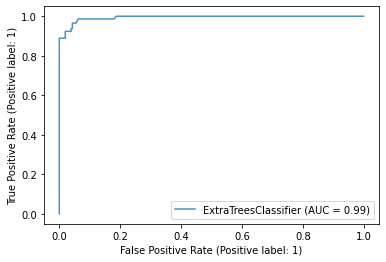

In [249]:
ax = plt.gca()
et3c_disp = RocCurveDisplay.from_estimator(et3, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## Komparasi Model ADASYN

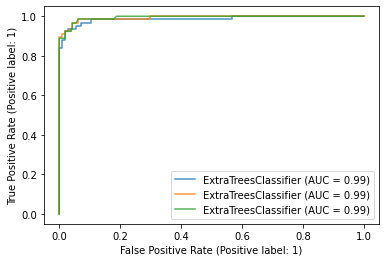

In [253]:
ax=plt.gca()
etc_disp.plot(ax=ax,alpha=0.8)
et2c_disp.plot(ax=ax,alpha=0.8)
et3c_disp.plot(ax=ax,alpha=0.8)
plt.show()